### Importing Libraries

In [3]:

import math
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import classification_report
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_auc_score
#from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_auc_score
#from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

### Importing and reading csv movie dataset 

In [5]:
IMDB_data_NoDup = pd.read_csv("../../data/processed/IMDB_data_NoDup.csv")
IMDB_data_NoDup.head(2)

Index    titleId                 title region titleType  startYear  \
0      0  tt0000019      The Clown Barber     GB     short     1898.0   
1      1  tt0232670  The Soldier's Return     GB     short     1903.0   

         genres  directors writers  AveRating  numVotes primaryName_Director  \
0  Comedy,Short  nm0932055      \N        5.3      19.0       Ingmar Bergman   
1   Drama,Short  nm0932055      \N        5.4      98.0       Ingmar Bergman   

   birthYear_Director  deathYear primaryProfession_director  \
0              1918.0     2007.0      writer,director,actor   
1              1918.0     2007.0      writer,director,actor   

                        Dir_knownForTitles  Age_of_movie  Director_age Decade  
0  tt0050976,tt0050986,tt0060827,tt0069467         124.0          89.0     D6  
1  tt0050976,tt0050986,tt0060827,tt0069467         119.0          89.0     D6

In [6]:
IMDB_data_NoDup[['P_writer', 'P_director', 'P_actor']] = IMDB_data_NoDup['primaryProfession_director'].str.split(',', expand=True)

In [7]:
IMDB_data_NoDup[['genere1', 'genere2', 'genere3']] = IMDB_data_NoDup['genres'].str.split(',', expand=True)

In [8]:
IMDB_data_NoDup['writers'] = IMDB_data_NoDup['writers'].replace('\\N', 0)
IMDB_data_NoDup['writers'] = IMDB_data_NoDup['writers'].fillna(0)
IMDB_data_NoDup['writers'].unique()

array([0, 'nm0932055', 'nm0996076,nm0932055', ..., 'nm10439323',
       'nm10538612', 'nm10538639'], dtype=object)

In [9]:
IMDB_data_NoDup = IMDB_data_NoDup.fillna(0)

In [10]:
IMDB_data_NoDup =  IMDB_data_NoDup.drop(IMDB_data_NoDup.columns[0], axis=1)

In [11]:
IMDB_data_NoDup.drop(columns=['genres', 'primaryProfession_director'], axis=1)
IMDB_data_NoDup.head(2)

titleId                 title region titleType  startYear        genres  \
0  tt0000019      The Clown Barber     GB     short     1898.0  Comedy,Short   
1  tt0232670  The Soldier's Return     GB     short     1903.0   Drama,Short   

   directors writers  AveRating  numVotes  ...  \
0  nm0932055       0        5.3      19.0  ...   
1  nm0932055       0        5.4      98.0  ...   

                        Dir_knownForTitles  Age_of_movie  Director_age Decade  \
0  tt0050976,tt0050986,tt0060827,tt0069467         124.0          89.0     D6   
1  tt0050976,tt0050986,tt0060827,tt0069467         119.0          89.0     D6   

  P_writer  P_director  P_actor genere1 genere2 genere3  
0   writer    director    actor  Comedy   Short       0  
1   writer    director    actor   Drama   Short       0  

[2 rows x 24 columns]

In [12]:
IMDB_data_NoDup.columns

Index(['titleId', 'title', 'region', 'titleType', 'startYear', 'genres',
       'directors', 'writers', 'AveRating', 'numVotes', 'primaryName_Director',
       'birthYear_Director', 'deathYear', 'primaryProfession_director',
       'Dir_knownForTitles', 'Age_of_movie', 'Director_age', 'Decade',
       'P_writer', 'P_director', 'P_actor', 'genere1', 'genere2', 'genere3'],
      dtype='object')

#### EDA : Pairplot 

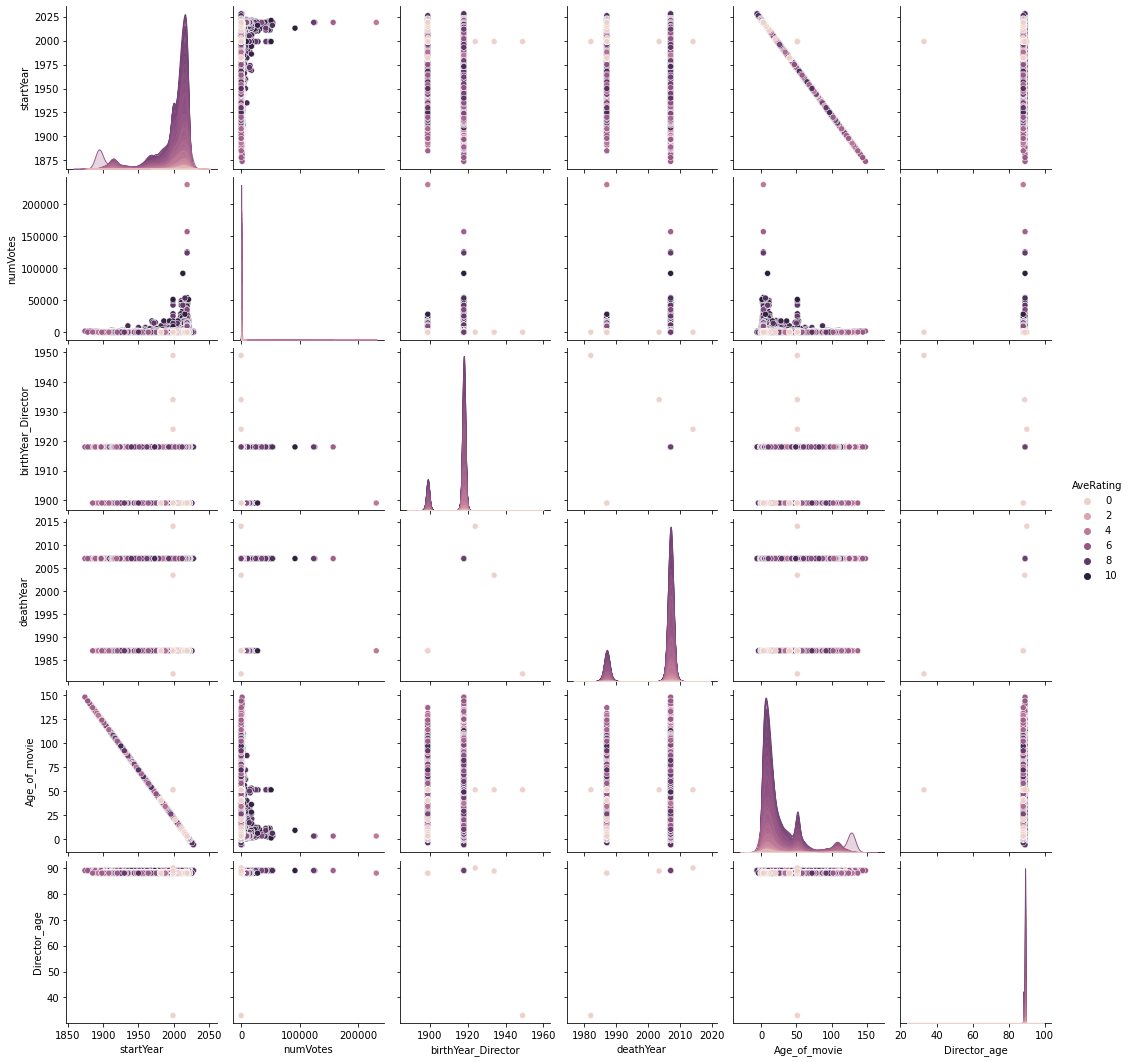

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns_plot = sns.pairplot(IMDB_data_NoDup, hue='AveRating', height=2.5)
plt.savefig('output.png')

In [2]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(IMDB_data_NoDup, height = 1.5)
plt.show()

NameError: name 'IMDB_data_NoDup' is not defined

In [138]:
sns.heatmap(IMDB_data_NoDup)

[Text(0.5, 1.0, 'Histogram: AveRating')]

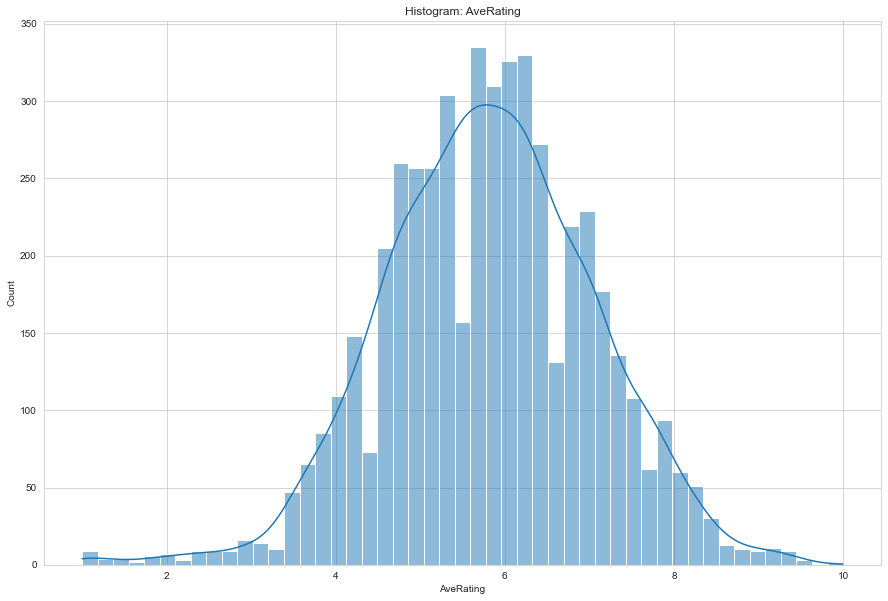

In [139]:
plt.figure(figsize=(15,10))
sns.histplot(data = IMDB_data_NoDup_copy,x = 'AveRating', kde = True).set(title='Histogram: AveRating')


In [140]:
# AveRating are normally distributed. 

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs startYear')]

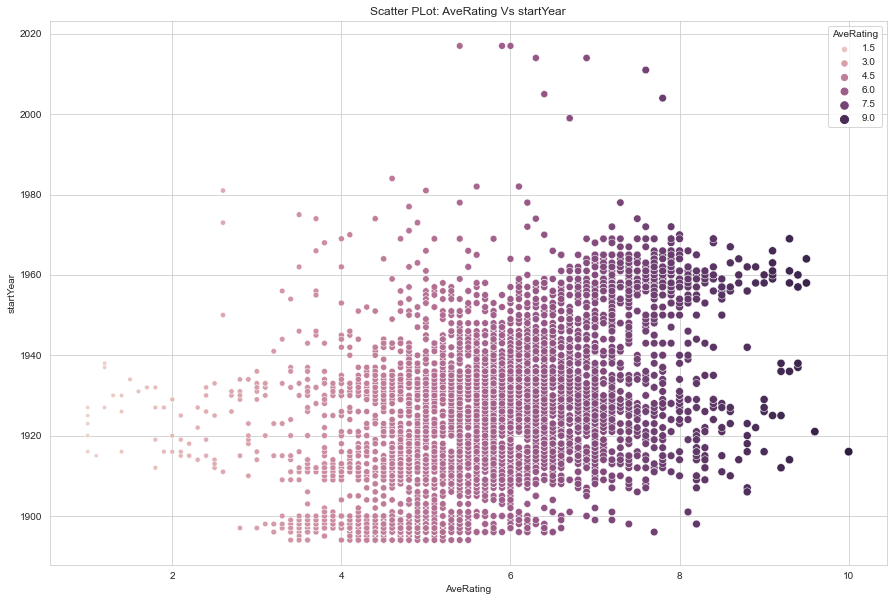

In [141]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="startYear", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs startYear')
                

Description: Movies with the release year 1900 to 1980 have a rating between 3.5 - 8.5. There are few movies with a high rating that were released after 2000. There are few movies with high and low ratings. Most movies have given a rating between 4-8. 

# BoxPlot: AveRating Vs startYear 

<AxesSubplot:xlabel='AveRating', ylabel='startYear'>

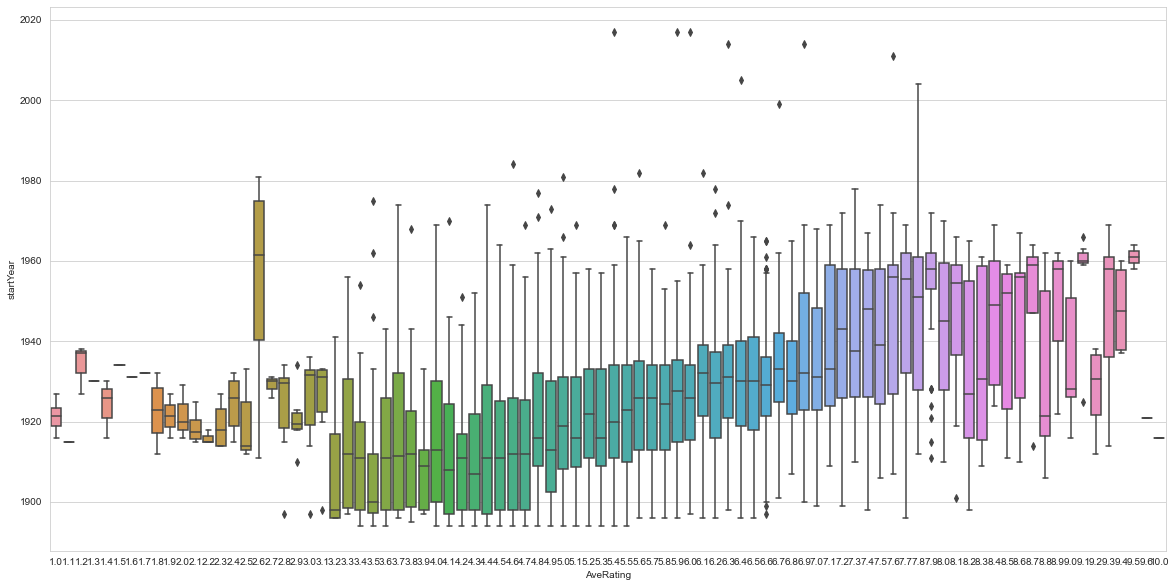

In [142]:
plt.figure(figsize=(20,10))
sns.boxplot(data=IMDB_data_NoDup_copy, x="AveRating", y="startYear")

Description: Movies that were released from 1900 t0 1980 have a wide range of ratings. It lies from 1.0 to 9.0. There are few movies after 1960 which are showing outliers. 


# Scatterplot: AveRating Vs Num_of_Votes

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs Num_of_Votes')]

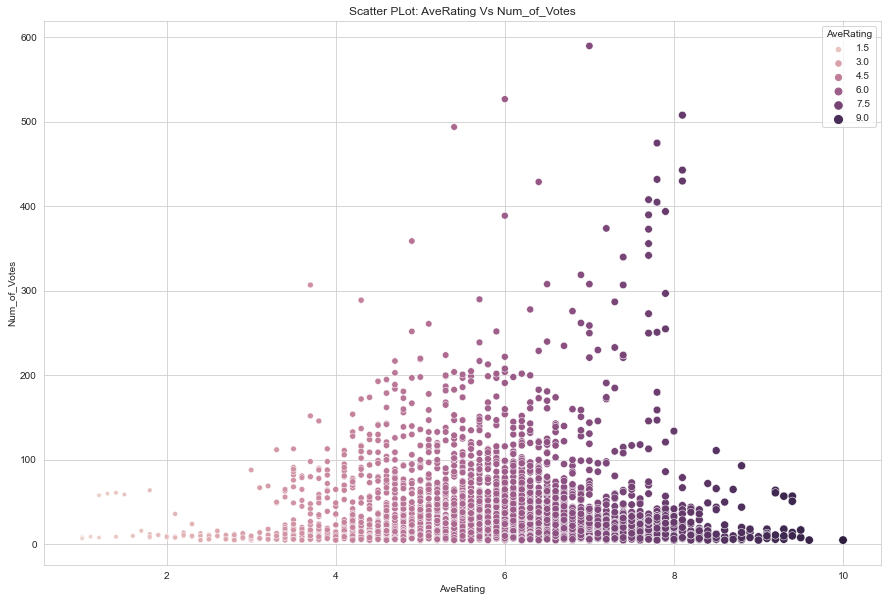

In [143]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="Num_of_Votes", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs Num_of_Votes')

Most of the votes have been given a rating from 4-8. There are few movies with fewer ratings and fewer numbers of votes and few movies with a high rating and fewer votes.

# ScatterPLot: AveRating Vs Dirctor_age

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs Director_age')]

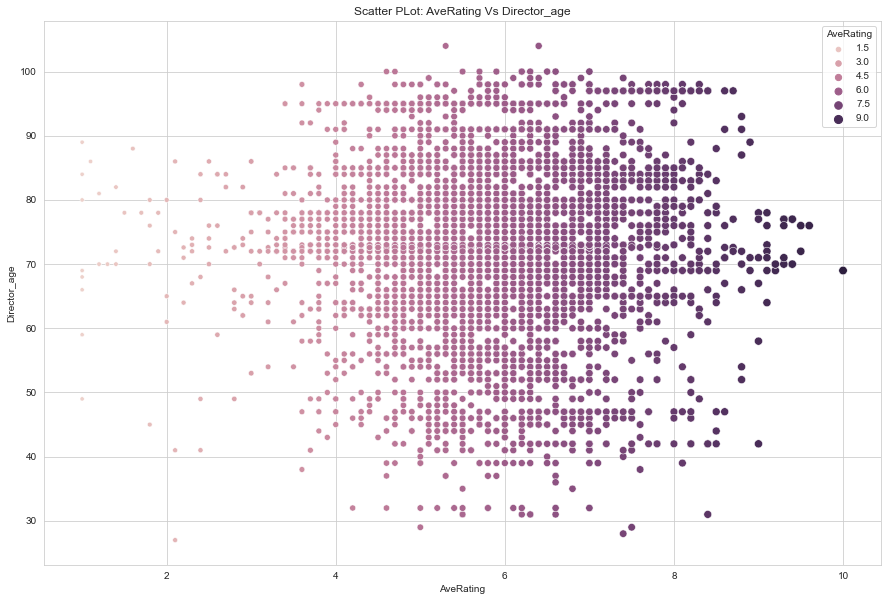

In [145]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="Director_age", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs Director_age')

Description: Director's age isn't affecting the movie rating. We can see there is no such pattern where age is related to the highly rated movie. Directors from different age groups have created high-rated movies.

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs Director_age')]

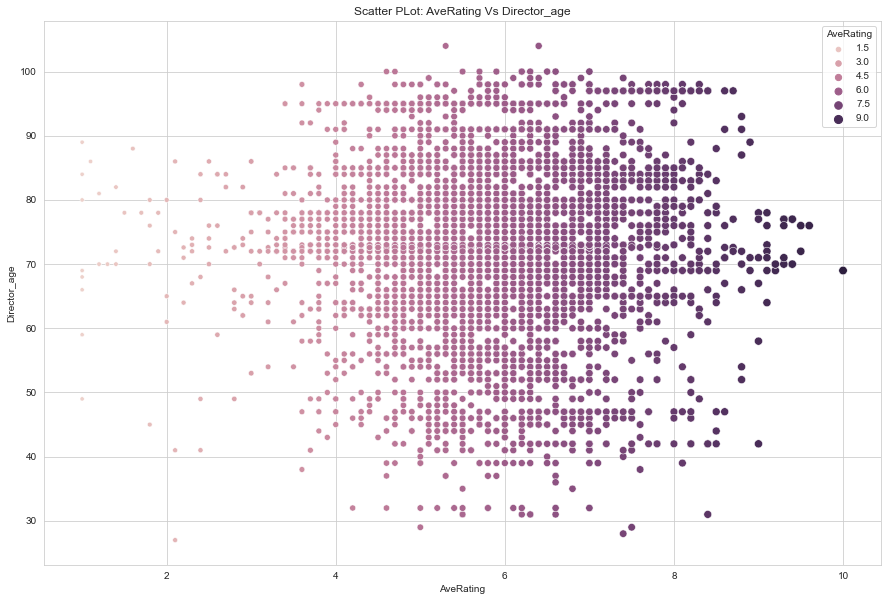

In [147]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="Director_age", hue = "AveRating"
                , size="AveRating").set(title='Scatter PLot: AveRating Vs Director_age')

In [148]:
#fig = px.histogram(IMDB_data_NoDup_copy)

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs Age_of_movie')]

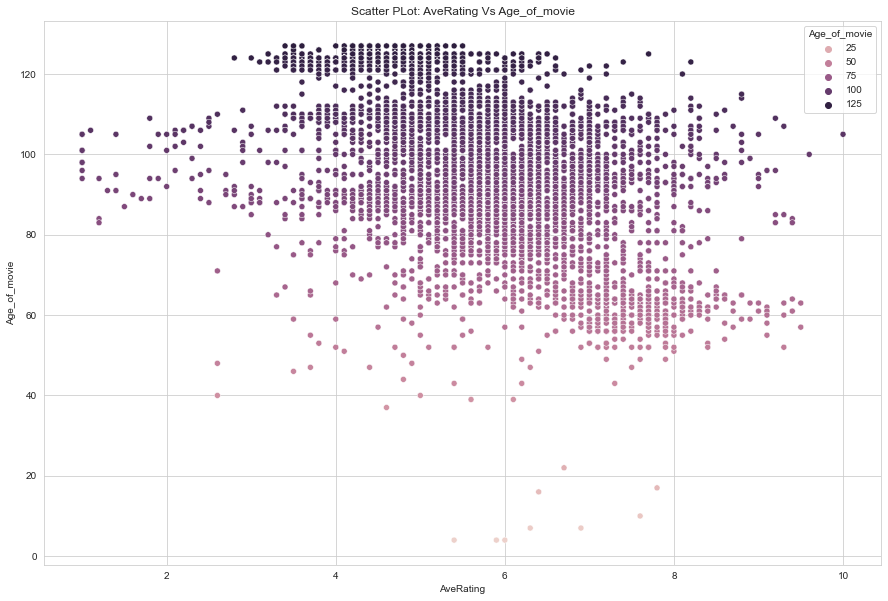

In [149]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="AveRating", y="Age_of_movie", hue = "Age_of_movie"
               ).set(title='Scatter PLot: AveRating Vs Age_of_movie')

People are showing a similar tendency over the years for giving movie ratings. They have given a rating based on the story of movies regardless of age. 

# Scatter plot: region vs AveRating

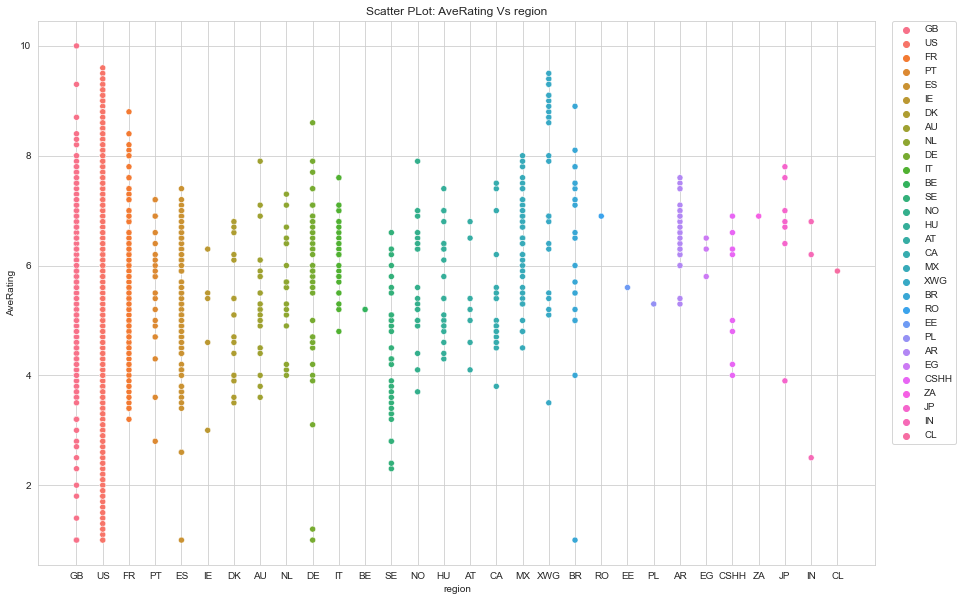

In [170]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="region", y="AveRating", hue = "region"
               ).set(title='Scatter PLot: AveRating Vs region')
#plt.legend(loc='lower left', title='genres')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

 US, GB and PT have wide rating ranges from where s others lie between 4-8. 

# Scatter Plot: Age_of_movie Vs region

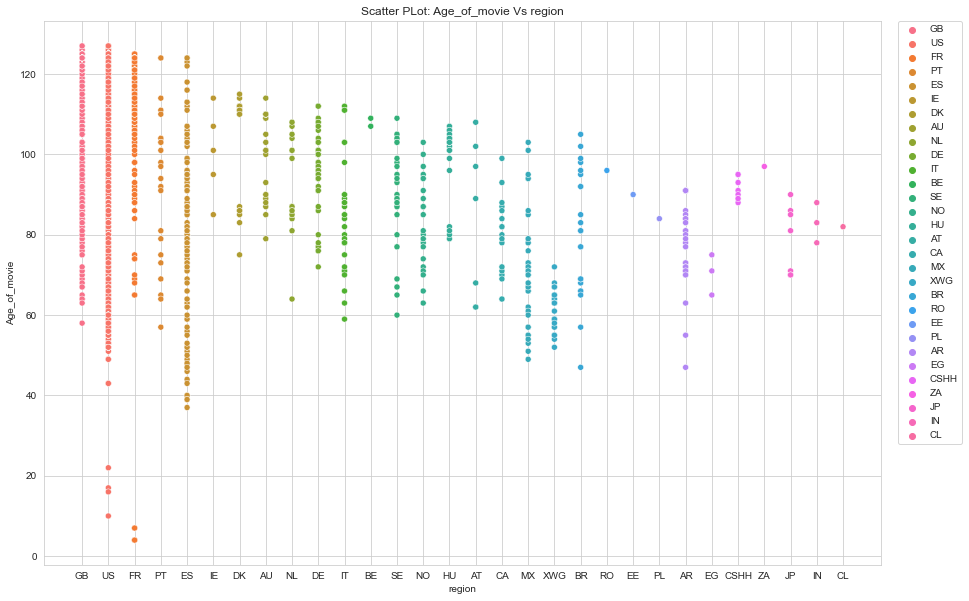

In [171]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="region", y="Age_of_movie", hue = "region"
               ).set(title='Scatter PLot: Age_of_movie Vs region')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

GB, US, FR, PT, and ES represent movies old as 120 and new as 10, whereas in the other regions movie's age is distributed from 45 to 100. 

# Scatter plot: AveRating Vs titleType

[Text(0.5, 1.0, 'Scatter PLot: AveRating Vs titleType')]

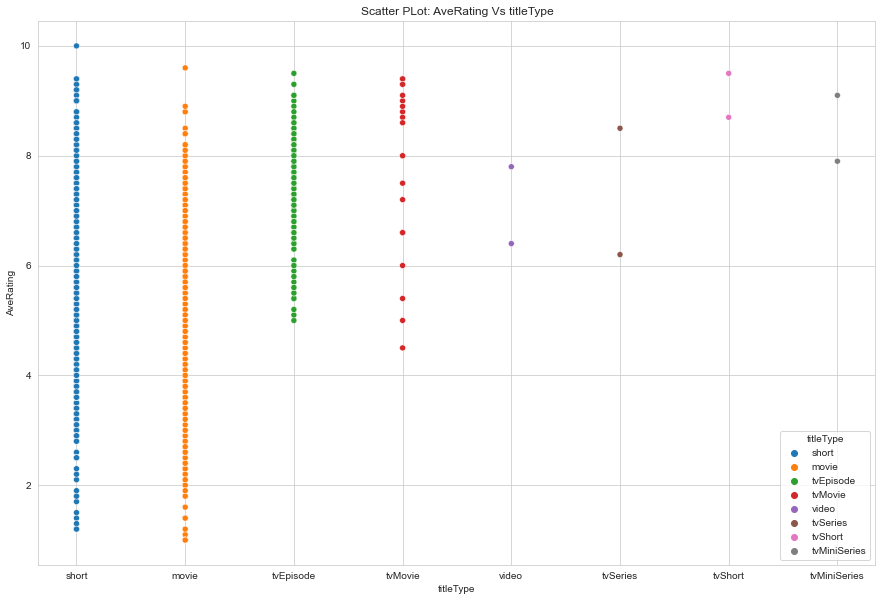

In [154]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="titleType", y="AveRating", hue ="titleType"
               ).set(title='Scatter PLot: AveRating Vs titleType')
#hue = "region").set(title='Scatter PLot: Age_of_movie Vs region')

 Avg_Rating for Short movies and movies ranges from 1 to 9 whereas tvepisodes and tvmovies have rated higher than 5.

# Scatter Plot: Ave_Rating Vs genre

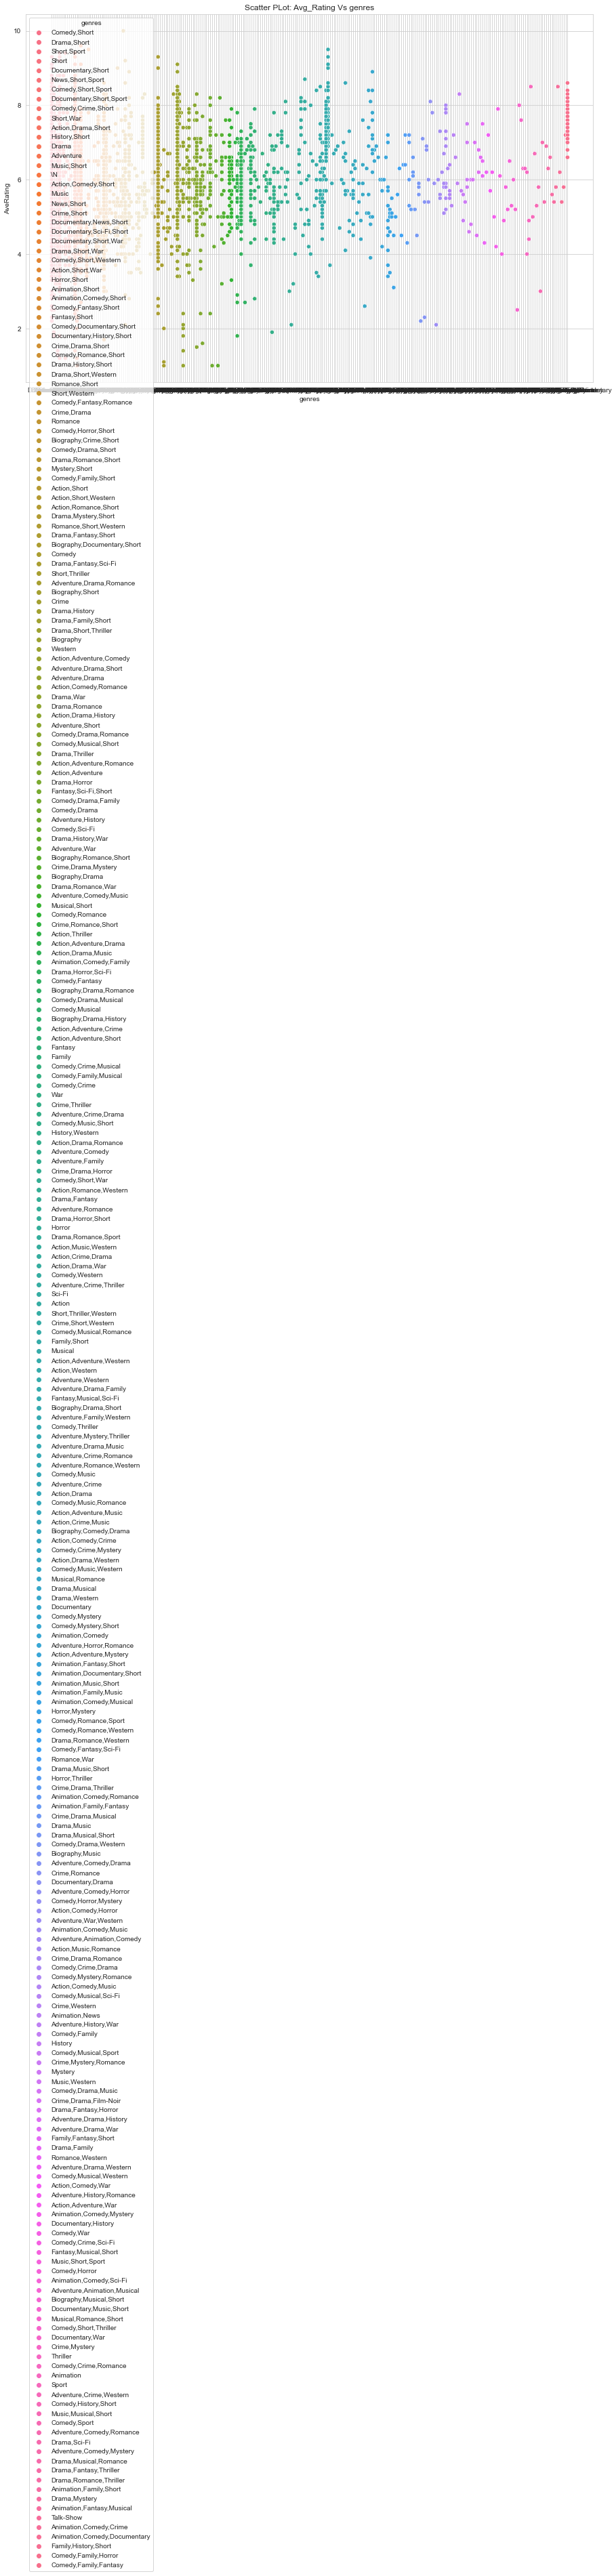

In [165]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="genres", y="AveRating", hue = "genres"
               ).set(title='Scatter PLot: Avg_Rating Vs genres')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='right', borderaxespad=0)
plt.legend(loc='upper left', title='genres')

In [158]:
#from above plot we can see that people are more likly to watch comedy, drama and sport movies and has been given high rating. 

# Scatter Plot: directors vs AveRating

In [ ]:
http://localhost:8888/notebooks/Desktop/reetu/Springboard%20course/Project%201/3%20data%20handling%20and%20EDA%20.ipynb#Scatter-Plot:-directors-vs-AveRating

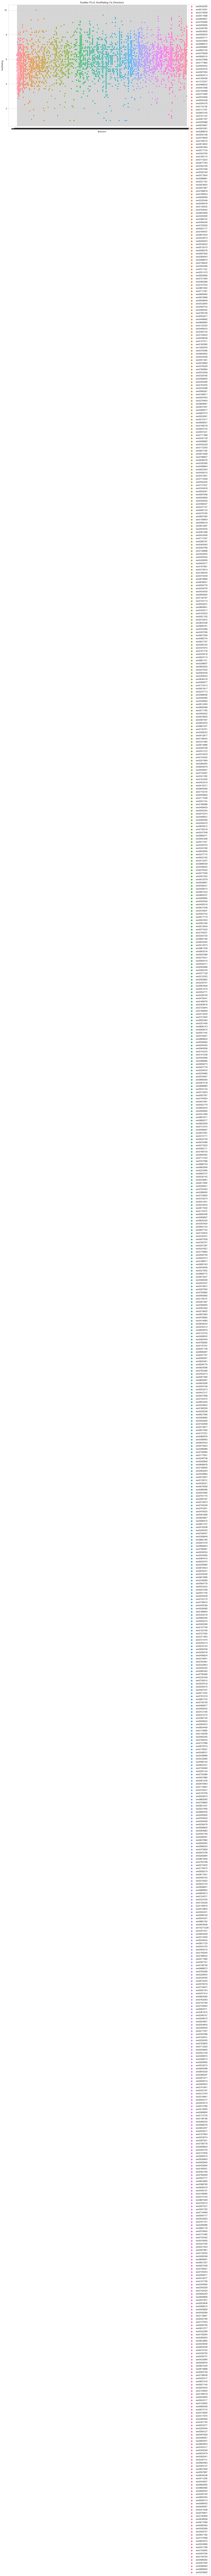

In [92]:
#Plot between directors and AveRating
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="directors", y="AveRating", hue = "directors"
               ).set(title='Scatter PLot: AveRating Vs Directors')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=0)


#from above plot we can see that except few director, mostly directors lie between 4- 8 movie rating range

# Scatter Plot: directors vs Num_of_Votes 

[Text(0.5, 1.0, 'Scatter PLot: directors Vs Num_of_Votes')]

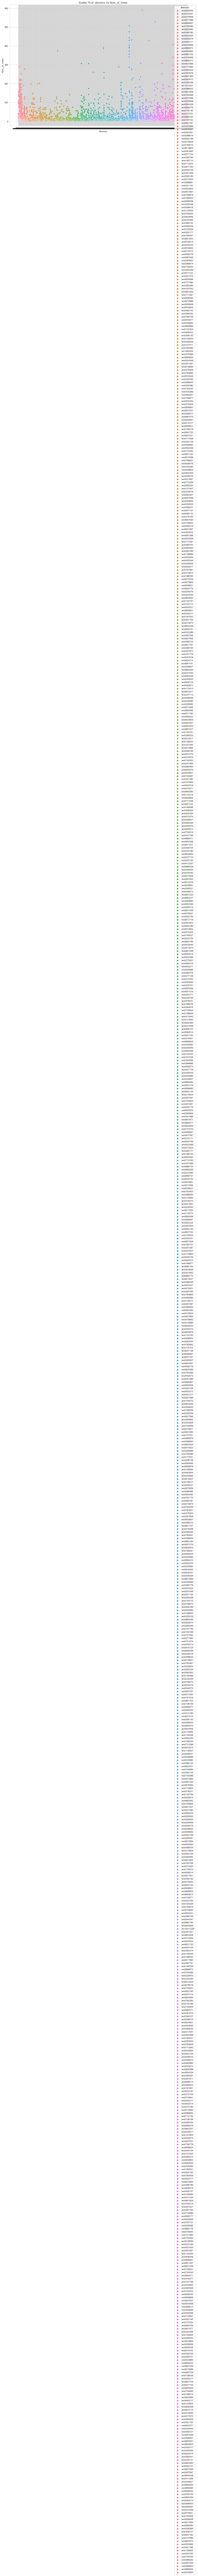

In [93]:
#Plot between AveRating Vs directors.

plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="directors", y="Num_of_Votes", hue ="directors"
               ).set(title='Scatter PLot: directors Vs Num_of_Votes')

# Scatter Plot: directors_age vs AveRating 

[Text(0.5, 1.0, 'Scatter PLot: Director_age Vs AveRating')]

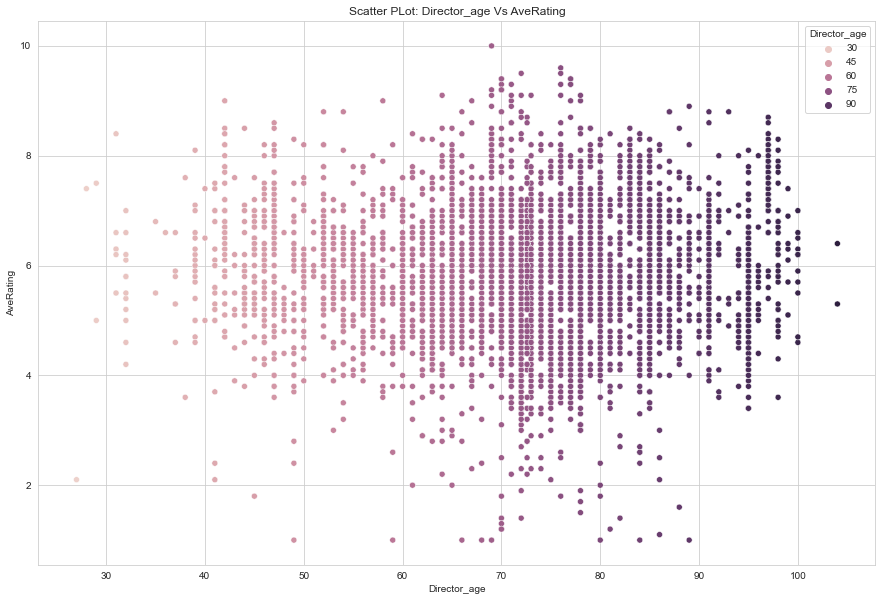

In [94]:
#Plot between directors and AveRating
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="Director_age", y='AveRating' , hue = "Director_age"
               ).set(title='Scatter PLot: Director_age Vs AveRating')

The movie rating is not related to the age of the directors. High or low rated movies can be directors of any age group 

# Scatter Plot: Decade vs AveRating 

[Text(0.5, 1.0, 'Scatter PLot: Decade Vs AveRating')]

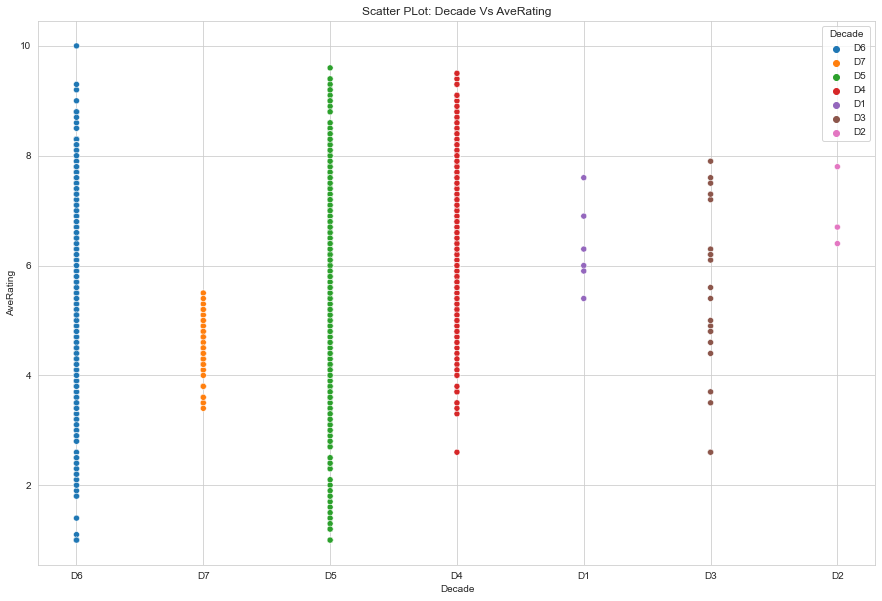

In [95]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="Decade", y= "AveRating" , hue = "Decade"
               ).set(title='Scatter PLot: Decade Vs AveRating')

Decades 4, 5, and 6 have all ranges of rating as low as 1 to as high as 10. The remaining decades don’t have these wide ranges of ratings.

# Scatter Plot: primaryProfession_director vs AveRating 

[Text(0.5, 1.0, 'Scatter PLot: primaryProfession_director Vs AveRating')]

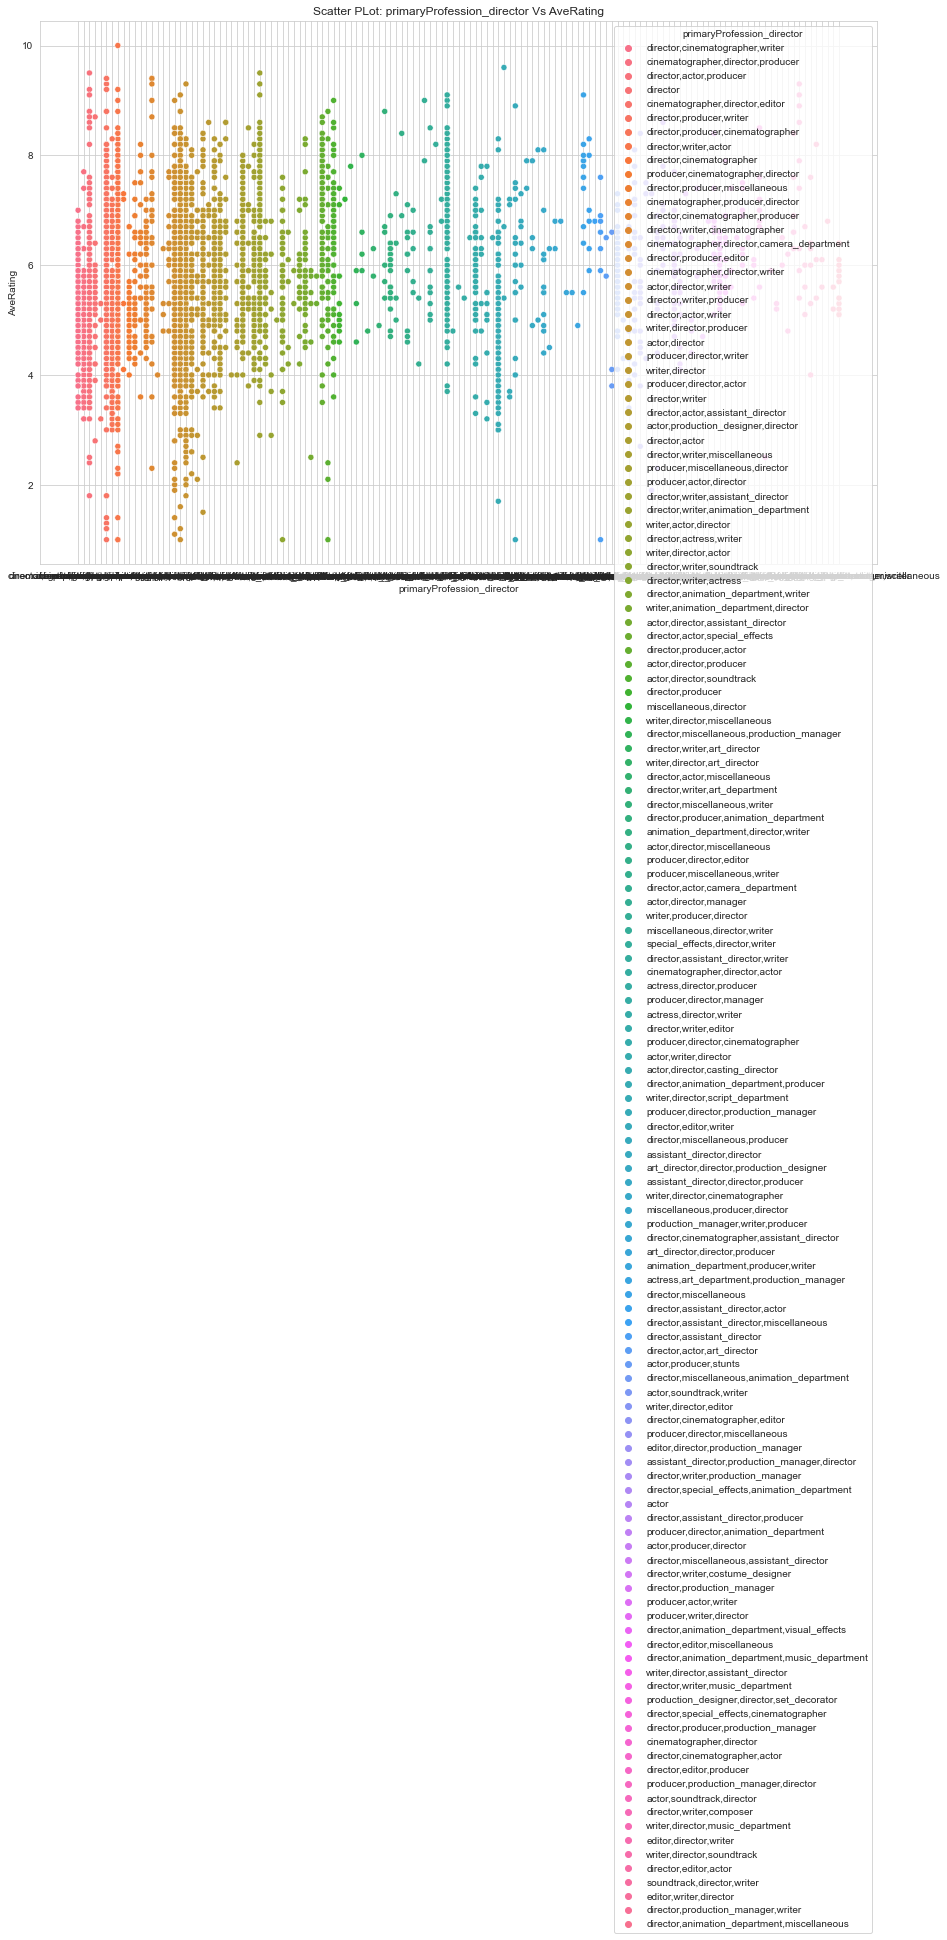

In [97]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=IMDB_data_NoDup_copy, x="primaryProfession_director", y= "AveRating" , hue = "primaryProfession_director"
               ).set(title='Scatter PLot: primaryProfession_director Vs AveRating')
